<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 4*

# 📝 Assignment
---

# Logistic Regression

이번에는 [**Cardiovascular Disease dataset**](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) 데이터셋을 사용해 봅시다. 데이터에 대한 설명을 캐글 페이지에서 잘 살펴보시고 과제를 진행해 주세요!

### 1) 데이터를 전처리 하겠습니다.
- 데이터를 불러오세요.(read_csv 사용)
- id 칼럼은 drop하세요.
- missing value를 확인하세요.
- 중복된 샘플이 있는지 확인하세요.
- **중복된 샘플을 제거하고 남은 샘플의 수를 과제 제출폼에 제출하세요.**

In [1]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/cardio/cardio_train.csv', sep=';')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
df = df.drop('id', axis=1)

df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [3]:
df[df.duplicated() == True]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10562,20495,1,165,70.0,120,80,1,1,0,0,1,0
21784,16793,1,165,68.0,120,80,1,1,0,0,1,0
38505,18988,1,164,65.0,120,80,1,1,0,0,1,0
40365,14552,1,158,64.0,120,80,1,1,0,0,1,0
42450,18353,1,169,67.0,120,80,1,1,0,0,1,0
44653,16937,2,170,70.0,120,80,1,1,0,0,0,0
45125,21280,1,165,65.0,120,80,1,1,0,0,1,0
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1
45810,21230,1,164,62.0,120,80,1,1,0,0,1,0
48917,21945,1,165,60.0,120,80,1,1,0,0,1,0


In [4]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(70000, 12)
(69976, 12)


### 2) 다운로드 한 훈련 데이터를 훈련/검증/테스트 세트로 나누어 주세요.
- 타겟 특성을 확인하고 타겟 변수를 나누어 줍니다.
- 훈련과 테스트 데이터로 나누어 줍니다(train_test_split 사용, train/test = 80/20, random_state=2)
- 훈련데이터를 훈련과 검증데이터로 나누어 줍니다(train_test_split 사용, train/validation = 80/20, random_state=2)
- **검증 데이터(X_val)의 갯수를 과제 제출폼에 제출하세요.**

In [5]:
target = 'cardio'
data_y = df[target]
data_X = df.drop(target, axis=1)

data_y.shape, data_X.shape

((69976,), (69976, 11))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size=0.8, test_size=0.2, random_state=2)
print(X_train.shape)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=2)
print(X_train.shape)

len(X_val)

(55980, 11)
(44784, 11)


11196

### 3) 사이킷런의 LogisticRegression을 사용해 모델을 만들어 보세요.
- 모델을 만들기 전에 기준모델을 설정합니다.
- **LogisticRegression 모델을 학습하고(max_iter=1000) 검증세트 정확도를 과제 제출폼에 제출하세요.**


In [7]:
# 타겟 데이터 범주의 비율을 확인
y_train.value_counts(normalize=True)

1    0.501697
0    0.498303
Name: cardio, dtype: float64

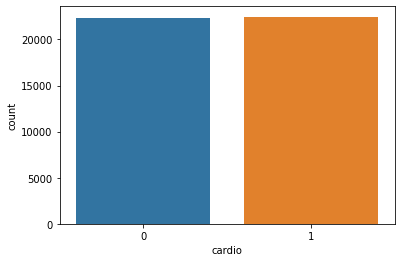

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

In [9]:
# mode(): Return the highest frequency value in a Series.
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
y_pred = [major] * len(y_train)

In [10]:
# 최다 클래스의 빈도 = 정확도 (기준 모델)
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.501697034655234


In [11]:
# LogisticRegression 모델을 학습
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
print('검증세트 정확도', round(logistic.score(X_val, y_val), 3))

검증세트 정확도 0.707


### 4) 데이터에서 범주형 성질을 지닌 특성을 찾아 원핫인코딩 하세요.
- category_encoders를 사용해서 'gender' 특성만 원핫인코딩 하세요.
- LogisticRegression 모델을 다시 학습합니다.
- **검증세트 정확도를 과제 제출폼에 제출하세요.**

In [13]:
# ! pip install category_encoders

In [14]:
# gender 내의 값을 텍스트로 변경(1 : FeMale, 2 : Male)
pd.set_option('mode.chained_assignment',  None)

X_train.gender.replace({1: "FeMale", 2: "Male"}, inplace=True)
X_val.gender.replace({1: "FeMale", 2: "Male"}, inplace=True)
X_test.gender.replace({1: "FeMale", 2: "Male"}, inplace=True)

X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
221,17591,FeMale,157,70.0,160,100,3,1,0,0,0
59211,19677,Male,174,80.0,150,80,1,1,0,0,1
26654,23504,FeMale,158,76.0,140,90,3,3,0,0,1
33421,18036,Male,173,128.0,160,110,3,1,0,1,0
12046,20225,Male,176,109.0,120,80,1,1,1,1,1


In [15]:
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(use_cat_names = True, cols=['gender'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)
X_test = encoder.transform(X_test)

X_train.head()

,age,gender_FeMale,gender_Male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
221,17591,1,0,157,70.0,160,100,3,1,0,0,0
59211,19677,0,1,174,80.0,150,80,1,1,0,0,1
26654,23504,1,0,158,76.0,140,90,3,3,0,0,1
33421,18036,0,1,173,128.0,160,110,3,1,0,1,0
12046,20225,0,1,176,109.0,120,80,1,1,1,1,1


In [17]:
logistic2 = LogisticRegression(max_iter=1000)
logistic2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
print('검증세트 정확도', round(logistic2.score(X_val, y_val), 3))

검증세트 정확도 0.694


### 5) 학습한 모델을 검증세트에서 최적화 시킨 후, 테스트세트에서 딱 한 번 정확도를 확인해 보세요.
- **테스트 세트 정확도를 과제 제출폼에 제출하세요.(0.712 이상)**

In [19]:
# 특성값 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [20]:
# 표준화한 데이터로 모델 학습
model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# 검증 데이터 결과 확인
y_pred = model.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

0.723383351196856

In [22]:
# 테스트 데이터 결과 확인
y_pred_test = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.7264218348099457

## 🔥 도전과제:

### 공지로 안내드리는 Github - Discussion 페이지에 올려보세요:)

### 6) EDA를 추가적으로 수행하고 아래 질문에 대한 본인만의 근거와 수행결과를 리포트해 보시고 서로 논해 보세요. 
- 새로운 특성을 만들 수 있다면, 어떤 특성공학을 해 볼 수 있을까요? 
- 아웃라이어가 있는 특성이 있다면, 어떤 기준으로 제거할 수 있을까요? 
- [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html) 문서를 보면 여러가지 종류의 Scalar가 있는데, 각 Scalar는 각각 어떤 상황에 적용하면 좋을까요? 본 데이터에서는 어떤 scalar를 적용해볼 수 있을까요? 
- 모델 성능을 높이기 위해 어떤 튜닝을 추가해 볼 수 있을까요? 


In [60]:
# 데이터 확인
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [106]:
# 가공할 데이터프레임 별도로 생성
df2 = df.copy()

# 특성 공학
# 1. 나이(age)를 days가 아닌 years(나이값)로 변경
# 2. gender를 범주(Male / Female)로 변경 후 One-hot Encoding
# 3. 키(height)와 몸무게(weight)를 이용하여 체질량 지수(BMI) 특성 만들기

In [107]:
# 1. 나이(age)를 days가 아닌 years(나이값)로 변경
def daysToAge(days):
  return int(days/365)

df2.age = df2.age.apply(daysToAge)

df2.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [108]:
# 2. gender를 범주(Male / Female)로 변경 후 One-hot Encoding
df2.gender.replace({1: "FeMale", 2: "Male"}, inplace=True)

encoder = OneHotEncoder(use_cat_names = True, cols=['gender'])
df2 = encoder.fit_transform(df2)

df2.head()

,age,gender_Male,gender_FeMale,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,0,168,62.0,110,80,1,1,0,0,1,0
1,55,0,1,156,85.0,140,90,3,1,0,0,1,1
2,51,0,1,165,64.0,130,70,3,1,0,0,0,1
3,48,1,0,169,82.0,150,100,1,1,0,0,1,1
4,47,0,1,156,56.0,100,60,1,1,0,0,0,0


In [109]:
# 3. 키(height)와 몸무게(weight)를 이용하여 체질량 지수(BMI) 특성 만들기
df2['BMI'] = df2['weight'] / ((df2['height'])/100)**2

df2.head()

,age,gender_Male,gender_FeMale,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,1,0,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,1,0,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [110]:
# 이상치(Outlier) 확인 및 제거
print(df2.shape)
df2.describe()

(69976, 14)


,age,gender_Male,gender_FeMale,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,52.840874,0.349648,0.650352,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771,27.557610
std,6.767103,0.476862,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004,6.092210
min,29.000000,0.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,0.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,0.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.391837
75%,58.000000,1.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,64.000000,1.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


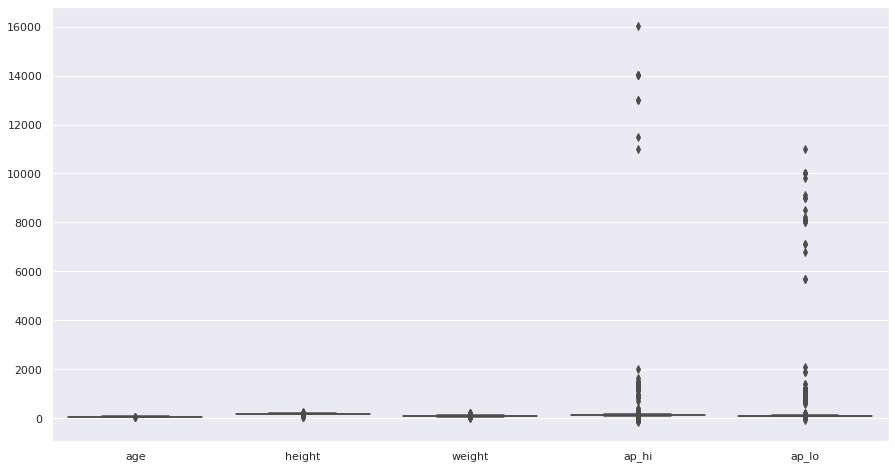

In [111]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=df2[['age', 'height', 'weight', 'ap_hi',	'ap_lo']])

In [112]:
import numpy as np

df2 = df2[(df2['ap_hi'] >= np.percentile(df2['ap_hi'], 1)) & 
        (df2['ap_hi'] <= np.percentile(df2['ap_hi'], 99))] 

print(df2.shape)
df2.describe()

(69286, 14)


,age,gender_Male,gender_FeMale,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,69286.000000,69286.000000,69286.000000,69286.000000,69286.000000,69286.000000,69286.000000,69286.000000,69286.000000,69286.000000,69286.00000,69286.000000,69286.000000,69286.000000
mean,52.835277,0.349291,0.650709,164.364489,74.178680,126.757801,95.836172,1.365745,1.225803,0.087954,0.05346,0.804015,0.498441,27.542889
std,6.767182,0.476750,0.476750,8.192468,14.359115,16.278822,182.915855,0.679631,0.571740,0.283230,0.22495,0.396960,0.500001,6.054755
min,29.000000,0.000000,0.000000,55.000000,10.000000,90.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,3.471784
25%,48.000000,0.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,23.875115
50%,53.000000,0.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,26.370238
75%,58.000000,1.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.00000,1.000000,1.000000,30.120482
max,64.000000,1.000000,1.000000,250.000000,200.000000,180.000000,10000.000000,3.000000,3.000000,1.000000,1.00000,1.000000,1.000000,298.666667


In [113]:
df2 = df2[(df2['ap_lo'] >= np.percentile(df2['ap_lo'], 5)) & 
        (df2['ap_lo'] <= np.percentile(df2['ap_lo'], 95))] 

print(df2.shape)
df2.describe()

(64737, 14)


,age,gender_Male,gender_FeMale,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000
mean,52.927584,0.352797,0.647203,164.462518,74.345696,127.075645,81.936296,1.366776,1.227104,0.087987,0.053200,0.803497,0.502139,27.572820
std,6.741393,0.477844,0.477844,8.144811,14.201848,15.045654,7.753612,0.681875,0.574191,0.283278,0.224434,0.397356,0.499999,5.993286
min,29.000000,0.000000,0.000000,55.000000,11.000000,90.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,0.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,0.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,26.423570
75%,58.000000,1.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.229568
max,64.000000,1.000000,1.000000,250.000000,200.000000,180.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [114]:
df2 = df2[(df2['height'] >= np.percentile(df2['height'], 1)) & 
        (df2['height'] <= np.percentile(df2['height'], 99))] 

print(df2.shape)
df2.describe()

(63579, 14)


,age,gender_Male,gender_FeMale,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000
mean,52.925400,0.350776,0.649224,164.512292,74.282284,127.059202,81.931628,1.365813,1.227323,0.087529,0.052973,0.804023,0.501659,27.480094
std,6.738508,0.477217,0.477217,7.340470,14.024788,15.037310,7.744565,0.681103,0.574521,0.282611,0.223982,0.396954,0.500001,5.133052
min,29.000000,0.000000,0.000000,147.000000,11.000000,90.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,0.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,0.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,26.402355
75%,58.000000,1.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.119376
max,64.000000,1.000000,1.000000,184.000000,200.000000,180.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,68.308315


In [115]:
df2 = df2[(df2['weight'] >= np.percentile(df2['weight'], 1)) & 
        (df2['weight'] <= np.percentile(df2['weight'], 99))] 

print(df2.shape)
df2.describe()

(62381, 14)


,age,gender_Male,gender_FeMale,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000
mean,52.942322,0.352671,0.647329,164.559257,74.028656,127.029624,81.919847,1.363893,1.225517,0.087495,0.052965,0.803835,0.501467,27.384440
std,6.730745,0.477805,0.477805,7.290703,12.734190,14.953875,7.718315,0.680084,0.572808,0.282561,0.223965,0.397098,0.500002,4.735633
min,29.000000,0.000000,0.000000,147.000000,49.000000,90.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.094795
25%,48.000000,0.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,0.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,26.397977
75%,58.000000,1.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.103806
max,64.000000,1.000000,1.000000,184.000000,116.000000,180.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,50.904716


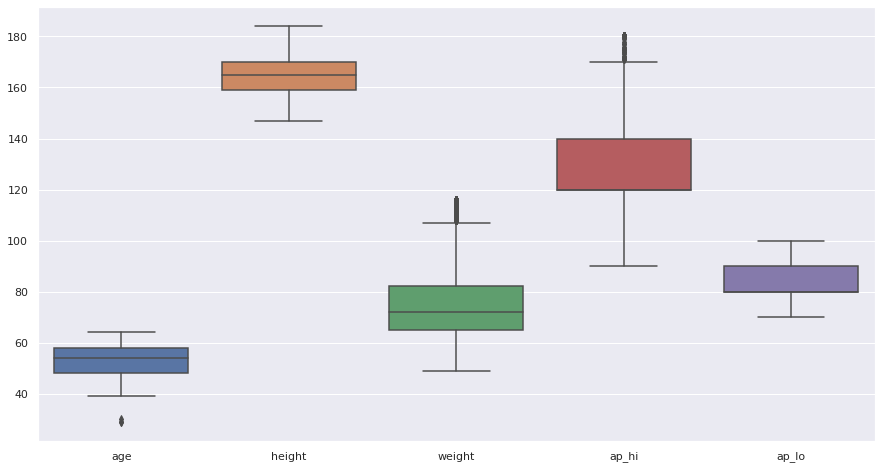

In [116]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=df2[['age', 'height', 'weight', 'ap_hi',	'ap_lo']])

In [118]:
# 데이터 나누기
target = 'cardio'
data_y = df2[target]
data_X = df2.drop(target, axis=1)

data_y.shape, data_X.shape

((62381,), (62381, 13))

In [119]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size=0.8, test_size=0.2, random_state=2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=2)

In [120]:
# 타겟 데이터 범주의 비율을 확인
y_train.value_counts(normalize=True)

1    0.501916
0    0.498084
Name: cardio, dtype: float64

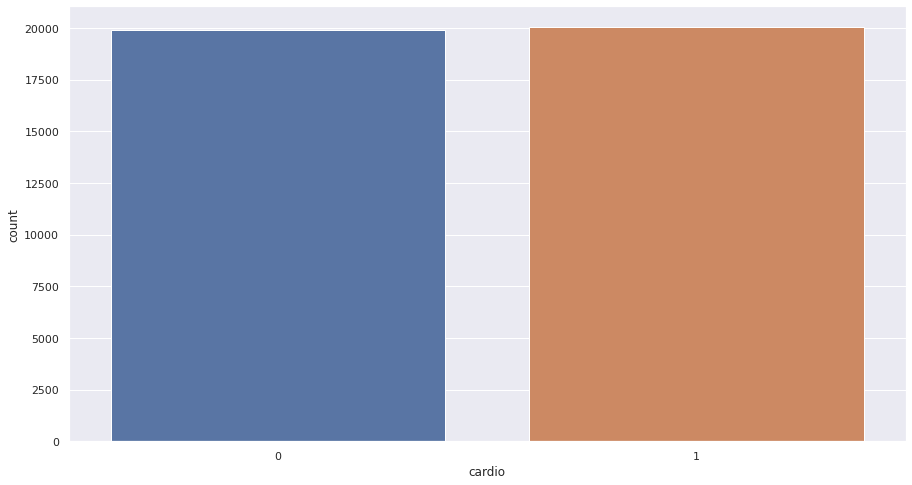

In [121]:
sns.countplot(x=y_train);

In [122]:
# mode(): Return the highest frequency value in a Series.
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
y_pred = [major] * len(y_train)

In [123]:
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.5019161886631767


In [124]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
print('검증세트 정확도', round(logistic.score(X_val, y_val), 3))

검증세트 정확도 0.718


In [126]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [127]:
# 표준화한 데이터로 모델 학습
model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
# 검증 데이터 결과 확인
y_pred = model.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

0.7203687005310089

In [129]:
# 테스트 데이터 결과 확인
y_pred_test = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.717319868558147

In [130]:
# feature scaling 문서를 보면 여러가지 종류의 Scalar가 있는데, 각 Scalar는 각각 어떤 상황에 적용하면 좋을까요? 본 데이터에서는 어떤 scalar를 적용해볼 수 있을까요?
# 모델 성능을 높이기 위해 어떤 튜닝을 추가해 볼 수 있을까요?

# 위 두 질문에 대한 답 작성 필요